# Machine Learning model building with scikit-learn

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_style("white")

In [2]:
df1 = pd.read_csv('data/MMP9_sm_mldescriptors.csv')
df2 = df1[np.isfinite(df1).all(1)]
df2 = df2.reset_index()
df2

,index,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.47
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.05
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.70
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.52
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362,2363,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.24
2363,2364,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.96
2364,2365,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.13
2365,2366,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.70


In [3]:
np.any(np.isfinite(df2))

True

In [4]:
#designate x and y values for ML models

x_values = df2.drop('pIC50', axis=1)
y_values = df2['pIC50']

In [5]:
#remove low variance features for improved processing
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x_values = selection.fit_transform(x_values)

## Data split for ML models

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=7)

In [7]:
X_train.shape, Y_train.shape

((1893, 150), (1893,))

In [8]:
X_test.shape, Y_test.shape

((474, 150), (474,))

## Regression model using Random Forest

In [9]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5501964689740011

In [10]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

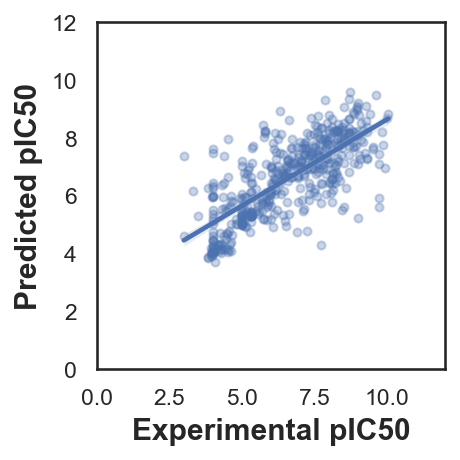

In [11]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.3, 's':15})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(3, 3)
plt.show

# Evaluate different machine learning models

In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:17<00:00,  4.71s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:19<00:00,  4.74s/it]


In [13]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.06
ExtraTreeRegressor,1.00,1.00,0.00,0.06
ExtraTreesRegressor,1.00,1.00,0.00,2.85
GaussianProcessRegressor,0.98,0.98,0.21,1.04
XGBRegressor,0.96,0.96,0.31,0.27
RandomForestRegressor,0.93,0.94,0.41,2.75
BaggingRegressor,0.91,0.92,0.48,0.35
MLPRegressor,0.84,0.86,0.62,1.81
HistGradientBoostingRegressor,0.80,0.82,0.70,1.68


In [14]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.41,0.60,1.05,0.84
HistGradientBoostingRegressor,0.39,0.59,1.06,1.57
LGBMRegressor,0.39,0.58,1.07,0.13
SVR,0.38,0.57,1.08,0.40
NuSVR,0.37,0.57,1.09,0.32
RandomForestRegressor,0.34,0.55,1.11,3.44
XGBRegressor,0.30,0.52,1.14,0.28
KNeighborsRegressor,0.30,0.52,1.15,0.04
BaggingRegressor,0.29,0.52,1.15,0.30


[(0.0, 1.0)]

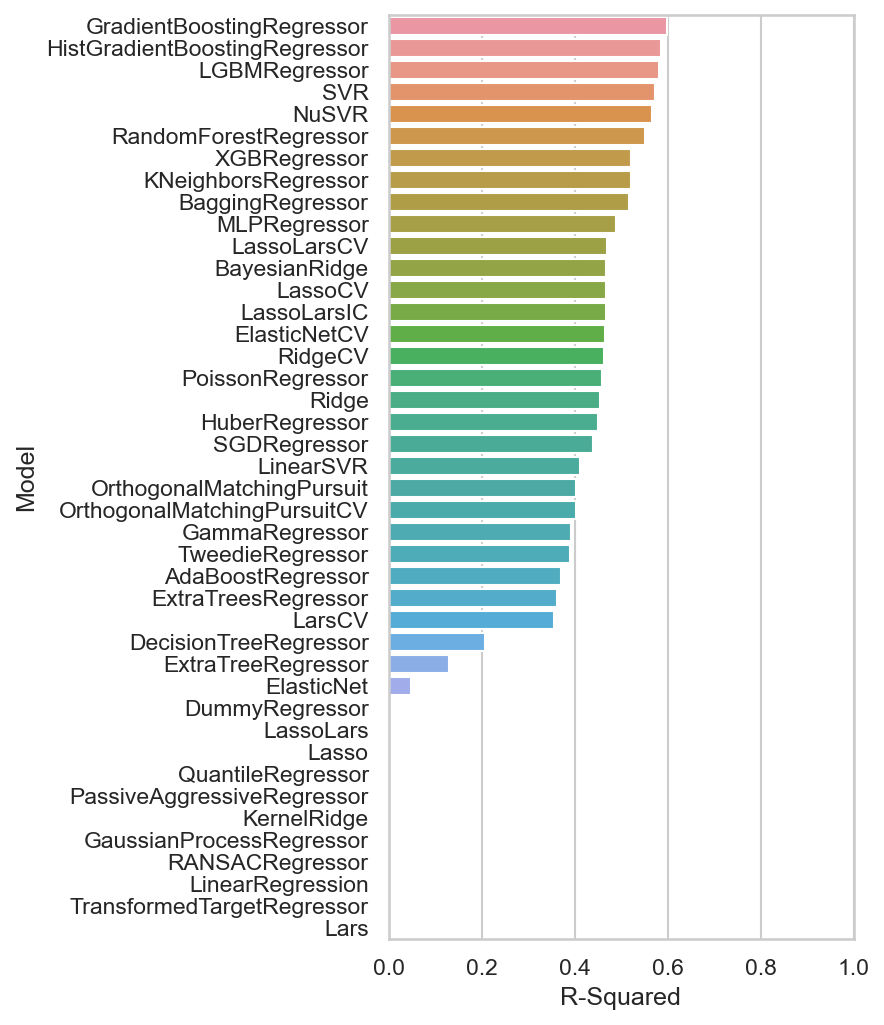

In [15]:
# Bar plot of R-squared values for test set

plt.figure(figsize=(4, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

# Rerun ML model with highest accuracy

In [25]:
model = GradientBoostingRegressor(n_estimators=200)
model.fit(X_train, Y_train)
r2_GBR = model.score(X_test, Y_test)
r2_GBR

0.6114184019342658

In [28]:
Y_pred_GBR = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

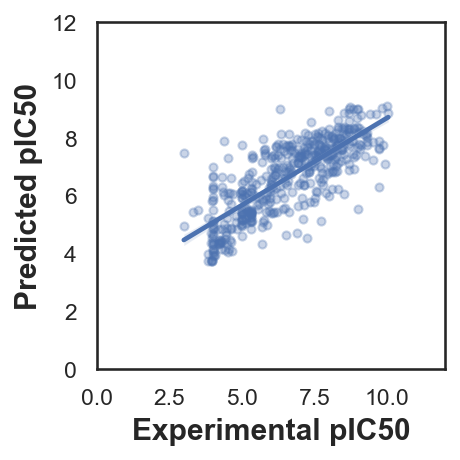

In [29]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred_GBR, scatter_kws={'alpha':0.3, 's':15})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(3, 3)
plt.show